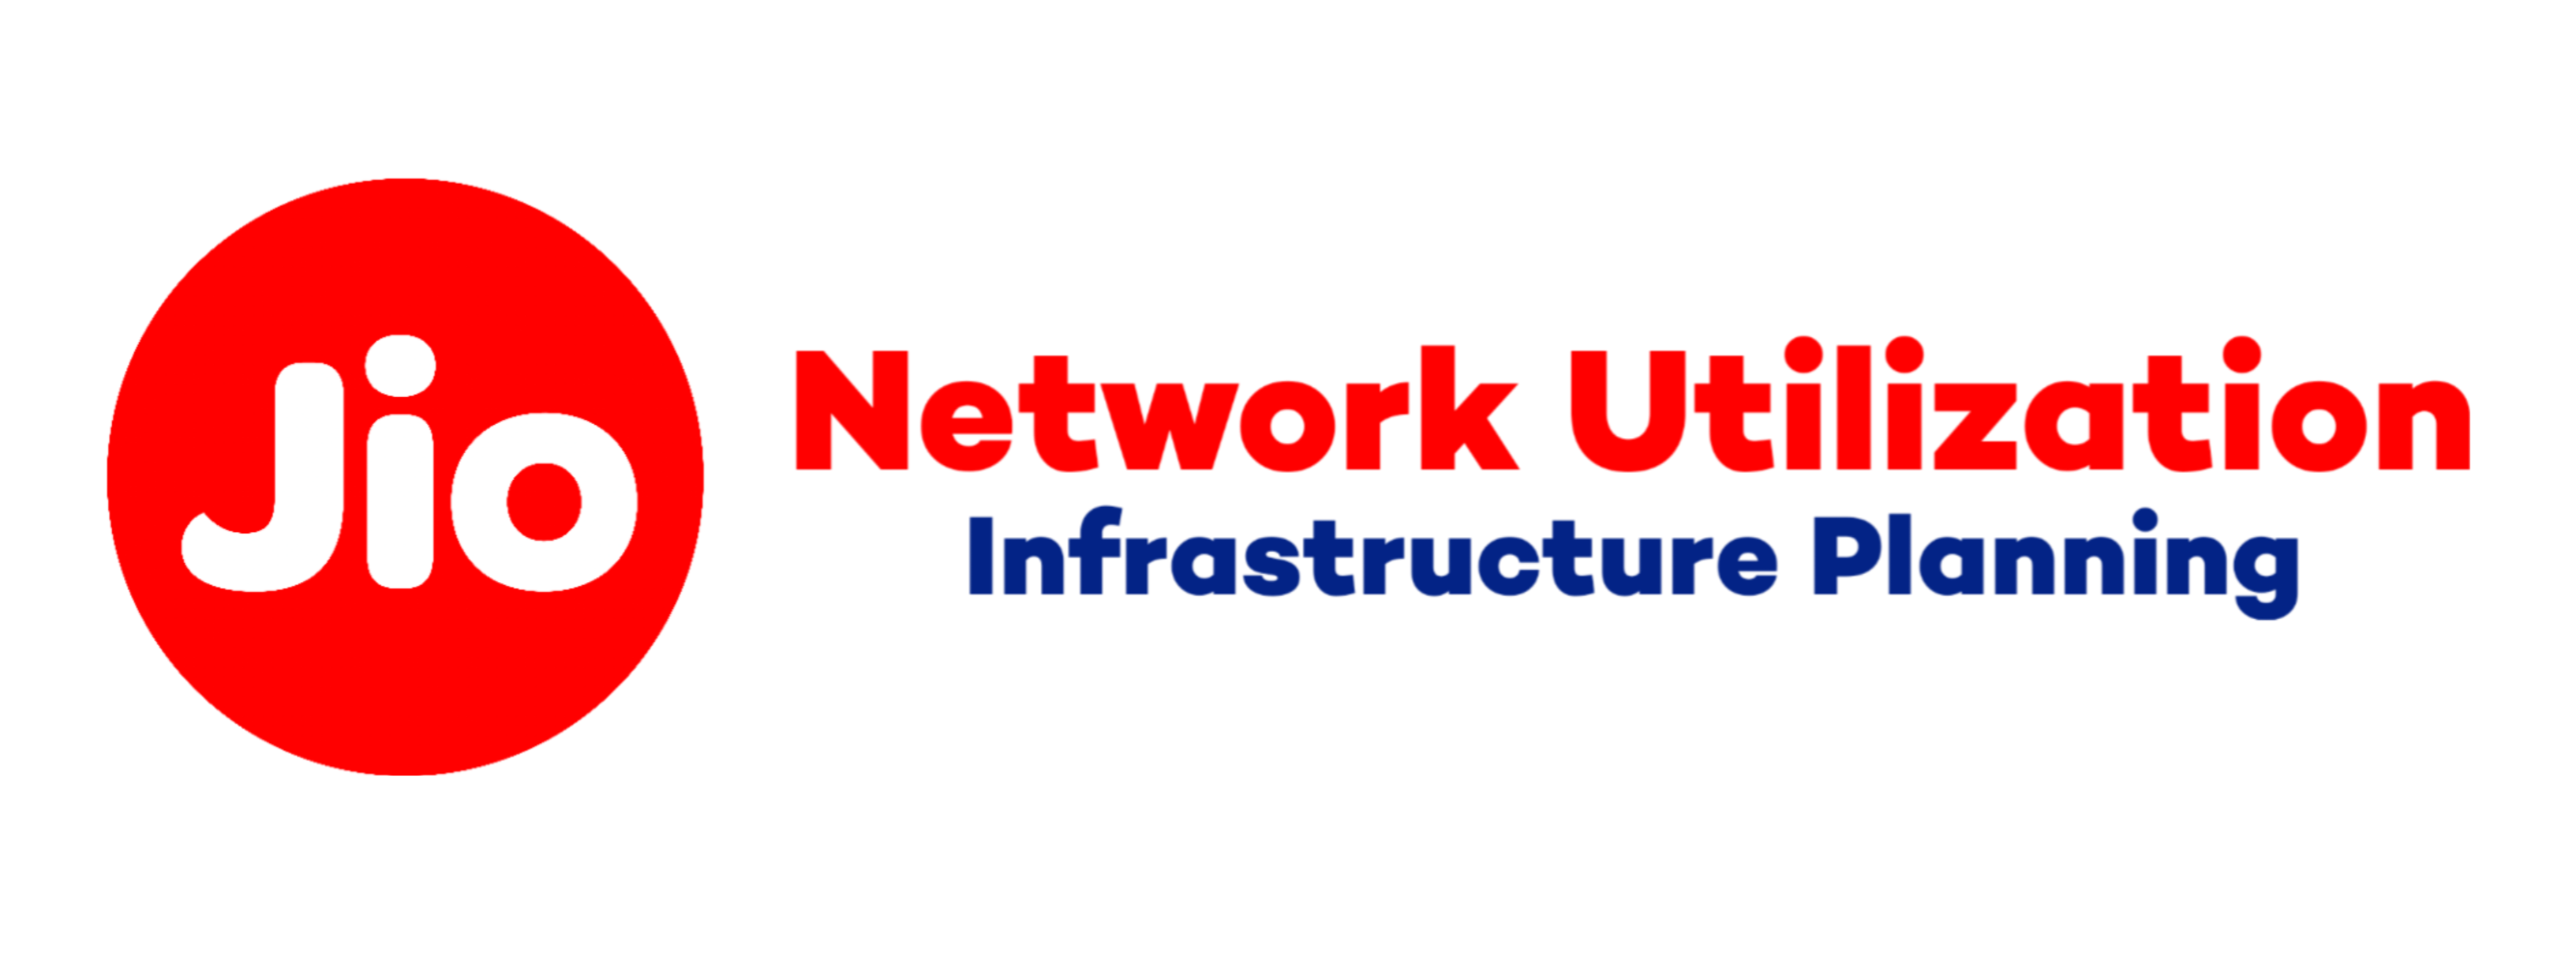

## Jio Network Utilization Infrastructure Planning Machine Learning Project
***Project By : PRASAD JADHAV***

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [104]:
df = pd.read_csv('network_utilization_dataset_v1.csv')
pd.set_option('display.max_columns',30)
print(df.shape)

(100000, 30)


In [93]:
df.head()

,Timestamp,Region,Cell_Tower_ID,Network_Type,Download_Speed_Mbps,Upload_Speed_Mbps,Latency_ms,Active_Connections,Data_Usage_MB,Peak_Hour_Flag,Network_Utilization_Percentage,Downtime_Minutes,Device_Type,User_Density,Weather_Condition,Handovers_Per_Minute,Signal_Strength_dBm,Throughput_Mbps,Congestion_Level,Service_Type,Packet_Loss_Percentage,Error_Rate_Percentage,Average_Session_Duration_Minutes,Device_OS,Application_Usage_Pattern,Bandwidth_Allocated_MHz,Energy_Consumption_kWh,Capacity_Planning_Index,AI_Optimization_Flag,Predicted_Traffic_Growth_Percentage
0,2024-01-01 00:00:00,Hyderabad,CT62017,5G,116.12,89.69,8.45,736,4406.94,1,83.00,1,Laptop,1024,Rainy,4.64,-36.02,101.04,Low,Browsing,1.69,2.56,50.07,iOS,"Streaming: 50%, Browsing: 30%, Gaming: 20%",24.95,7.86,1.73,1,10.75
1,2024-01-01 00:01:00,Chennai,CT55374,4G,151.68,79.13,38.15,173,2335.42,0,79.70,3,Smartphone,2448,Cloudy,2.70,-79.37,103.59,Low,Browsing,2.78,1.18,58.54,Windows,"Streaming: 60%, Gaming: 30%, Other: 10%",24.41,7.12,1.06,1,15.32
2,2024-01-01 00:02:00,Delhi,CT24113,4G,186.38,97.29,42.48,929,2227.19,0,74.72,0,Smartphone,2515,Clear,3.83,-58.45,58.63,Low,Browsing,4.03,2.24,54.13,Windows,"Browsing: 70%, Other: 30%",9.20,9.45,1.19,1,12.58
3,2024-01-01 00:03:00,Delhi,CT15245,5G,164.12,79.81,20.40,953,4450.67,1,46.32,3,Laptop,2787,Clear,3.05,-92.76,174.33,Medium,Voice Call,4.46,0.34,55.94,Windows,"Browsing: 70%, Other: 30%",29.51,7.83,1.43,1,7.24
4,2024-01-01 00:04:00,Bangalore,CT96332,5G,285.31,68.90,49.59,894,3227.79,1,61.07,2,IoT Device,1793,Cloudy,2.82,-110.53,109.95,High,Voice Call,3.50,0.15,9.96,Android,"Streaming: 50%, Browsing: 30%, Gaming: 20%",19.29,9.83,1.77,1,16.42


In [6]:
df.tail()

,Timestamp,Region,Cell_Tower_ID,Network_Type,Download_Speed_Mbps,Upload_Speed_Mbps,Latency_ms,Active_Connections,Data_Usage_MB,Peak_Hour_Flag,Network_Utilization_Percentage,Downtime_Minutes,Device_Type,User_Density,Weather_Condition,Handovers_Per_Minute,Signal_Strength_dBm,Throughput_Mbps,Congestion_Level,Service_Type,Packet_Loss_Percentage,Error_Rate_Percentage,Average_Session_Duration_Minutes,Device_OS,Application_Usage_Pattern,Bandwidth_Allocated_MHz,Energy_Consumption_kWh,Capacity_Planning_Index,AI_Optimization_Flag,Predicted_Traffic_Growth_Percentage
99995,2024-03-10 10:35:00,Delhi,CT46878,5G,208.91,87.95,33.11,527,946.79,0,79.77,2,IoT Device,2238,Cloudy,1.67,-119.75,40.04,Low,Video Streaming,3.08,2.73,58.26,iOS,"Streaming: 50%, Browsing: 30%, Gaming: 20%",6.86,6.58,1.45,1,12.24
99996,2024-03-10 10:36:00,Mumbai,CT89764,4G,295.33,94.93,10.93,141,2099.35,1,40.53,1,IoT Device,2791,Cloudy,1.10,-118.08,113.76,Medium,Browsing,2.50,0.10,10.86,Android,"Browsing: 70%, Other: 30%",5.36,5.99,1.72,1,5.06
99997,2024-03-10 10:37:00,Chennai,CT77076,4G,249.54,78.20,30.67,655,3103.12,0,45.76,1,Laptop,1038,Rainy,1.14,-77.43,138.12,Low,Voice Call,0.86,2.06,48.25,Android,"Streaming: 50%, Browsing: 30%, Gaming: 20%",11.44,7.26,1.43,0,7.43
99998,2024-03-10 10:38:00,Delhi,CT77954,5G,173.17,99.41,16.86,304,2859.82,0,31.54,0,Smartphone,1832,Rainy,3.25,-102.97,168.04,High,Voice Call,0.22,0.35,32.36,Android,"Browsing: 70%, Other: 30%",29.05,1.09,0.59,0,16.28
99999,2024-03-10 10:39:00,Mumbai,CT76292,5G,50.92,92.55,24.25,828,2019.15,0,90.48,3,IoT Device,1057,Rainy,1.79,-43.53,59.39,High,Gaming,4.62,1.52,56.25,Windows,"Browsing: 70%, Other: 30%",24.56,2.53,1.78,1,10.32


### Dataset Structure Overview Columns:

- Timestamp: Date and time of data capture.
- Region: Geographical area of network data collection.
- Cell_Tower_ID: Unique identifier for the cell tower.
- Network_Type: Type of network (e.g., 4G, 5G).
- Download_Speed_Mbps: Average download speed in Mbps.
- Upload_Speed_Mbps: Average upload speed in Mbps.
- Latency_ms: Latency in milliseconds.
- Active_Connections: Number of active connections at the timestamp.
- Data_Usage_MB: Total data usage in MB.
- Peak_Hour_Flag: Binary flag (1 for peak hours, 0 otherwise).
- Network_Utilization_Percentage: Percentage of network capacity utilized.
- Downtime_Minutes: Minutes of downtime during the period (if any).
- Device_Type: Device type (e.g., smartphone, IoT device).
- User_Density: Number of users per square kilometer in the region.
- Weather_Condition: Weather during the data collection (e.g., Clear, Rainy).
- Handovers_Per_Minute: Number of handovers between cell towers per minute.
- Signal_Strength_dBm: Signal strength in decibels (e.g., -30 dBm to -120 dBm).
- Throughput_Mbps: Total data transferred per second.
- Congestion_Level: Categorical (Low, Medium, High) based on network utilization.
- Service_Type: Type of service in use (e.g., Video Streaming, Voice Call, Browsing).
- Packet_Loss_Percentage: Percentage of lost packets during data transmission.
- Error_Rate_Percentage: Error rate in data transmission as a percentage.
- Average_Session_Duration_Minutes: Average time a user session lasts.
- Device_OS: Operating system of the device (e.g., Android, iOS, Windows).
- Application_Usage_Pattern: Proportion of time spent on various apps (e.g., Streaming: 60%, Gaming: 30%, Other: 10%).
- Bandwidth_Allocated_MHz: Bandwidth allocated to the cell tower in MHz.
- Energy_Consumption_kWh: Energy consumption of the cell tower in kilowatt-hours.
- Capacity_Planning_Index: A calculated metric to determine future infrastructure needs based on utilization and user growth trends.
- AI_Optimization_Flag: Binary flag indicating whether AI optimization was used for load balancing.
- Predicted_Traffic_Growth_Percentage: Predicted traffic growth based on historical data and trend analysis.

### Data Exploration

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 30 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Timestamp                            100000 non-null  object 
 1   Region                               100000 non-null  object 
 2   Cell_Tower_ID                        100000 non-null  object 
 3   Network_Type                         100000 non-null  object 
 4   Download_Speed_Mbps                  100000 non-null  float64
 5   Upload_Speed_Mbps                    100000 non-null  float64
 6   Latency_ms                           100000 non-null  float64
 7   Active_Connections                   100000 non-null  int64  
 8   Data_Usage_MB                        100000 non-null  float64
 9   Peak_Hour_Flag                       100000 non-null  int64  
 10  Network_Utilization_Percentage       100000 non-null  float64
 11  Downtime_Minut

In [8]:
df.isnull().sum()

Timestamp                              0
Region                                 0
Cell_Tower_ID                          0
Network_Type                           0
Download_Speed_Mbps                    0
Upload_Speed_Mbps                      0
Latency_ms                             0
Active_Connections                     0
Data_Usage_MB                          0
Peak_Hour_Flag                         0
Network_Utilization_Percentage         0
Downtime_Minutes                       0
Device_Type                            0
User_Density                           0
Weather_Condition                      0
Handovers_Per_Minute                   0
Signal_Strength_dBm                    0
Throughput_Mbps                        0
Congestion_Level                       0
Service_Type                           0
Packet_Loss_Percentage                 0
Error_Rate_Percentage                  0
Average_Session_Duration_Minutes       0
Device_OS                              0
Application_Usag

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

,Download_Speed_Mbps,Upload_Speed_Mbps,Latency_ms,Active_Connections,Data_Usage_MB,Peak_Hour_Flag,Network_Utilization_Percentage,Downtime_Minutes,User_Density,Handovers_Per_Minute,Signal_Strength_dBm,Throughput_Mbps,Packet_Loss_Percentage,Error_Rate_Percentage,Average_Session_Duration_Minutes,Bandwidth_Allocated_MHz,Energy_Consumption_kWh,Capacity_Planning_Index,AI_Optimization_Flag,Predicted_Traffic_Growth_Percentage
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,175.244718,55.103612,27.468234,550.661890,2742.208129,0.499310,65.014087,1.497680,1752.783790,2.994469,-74.939521,105.108806,2.500441,1.504601,32.552248,22.500563,5.491226,1.250239,0.498730,12.516496
std,72.265143,25.989322,12.932158,260.253855,1298.497193,0.500002,20.219648,1.118511,722.023671,1.157116,25.944542,54.831912,1.441196,0.866716,15.886833,10.102965,2.602995,0.433383,0.500001,4.333817
min,50.000000,10.000000,5.000000,100.000000,500.030000,0.000000,30.000000,0.000000,500.000000,1.000000,-120.000000,10.000000,0.000000,0.000000,5.000000,5.000000,1.000000,0.500000,0.000000,5.000000
25%,112.750000,32.640000,16.340000,325.000000,1617.097500,0.000000,47.440000,0.000000,1126.000000,1.990000,-97.342500,57.737500,1.250000,0.750000,18.820000,13.740000,3.230000,0.870000,0.000000,8.780000
50%,175.470000,55.040000,27.410000,551.000000,2738.170000,0.000000,65.090000,1.000000,1756.000000,2.990000,-74.800000,105.070000,2.500000,1.510000,32.580000,22.490000,5.490000,1.250000,0.000000,12.530000
75%,237.760000,77.610000,38.600000,776.000000,3866.690000,1.000000,82.510000,2.000000,2379.000000,4.000000,-52.460000,152.730000,3.740000,2.260000,46.340000,31.220000,7.760000,1.630000,1.000000,16.270000
max,300.000000,100.000000,50.000000,999.000000,4999.960000,1.000000,100.000000,3.000000,2999.000000,5.000000,-30.000000,200.000000,5.000000,3.000000,60.000000,40.000000,10.000000,2.000000,1.000000,20.000000


In [11]:
cat_cols = [x for x in df.columns if df[x].dtypes != 'float64']

for col in cat_cols:
    print(f"Value counts for column '{col}':")
    print(df[col].value_counts())
    print("\n" + "_"*40 + "\n")

Value counts for column 'Timestamp':
Timestamp
2024-01-01 00:00:00    1
2024-02-16 06:50:00    1
2024-02-16 07:12:00    1
2024-02-16 07:11:00    1
2024-02-16 07:10:00    1
                      ..
2024-01-24 03:31:00    1
2024-01-24 03:30:00    1
2024-01-24 03:29:00    1
2024-01-24 03:28:00    1
2024-03-10 10:39:00    1
Name: count, Length: 100000, dtype: int64

________________________________________

Value counts for column 'Region':
Region
Delhi        20196
Mumbai       20037
Chennai      20030
Hyderabad    19906
Bangalore    19831
Name: count, dtype: int64

________________________________________

Value counts for column 'Cell_Tower_ID':
Cell_Tower_ID
CT28273    9
CT54080    8
CT23844    8
CT23957    7
CT80638    7
          ..
CT11451    1
CT90196    1
CT99031    1
CT34175    1
CT76292    1
Name: count, Length: 60333, dtype: int64

________________________________________

Value counts for column 'Network_Type':
Network_Type
4G    50024
5G    49976
Name: count, dtype: int64

__

In [12]:
num_cols = [x for x in df.columns if df[x].dtypes == 'float64']

for col in num_cols:
    print(f"Value counts for column '{col}':")
    print(df[col].value_counts())
    print("\n" + "_"*40 + "\n")

Value counts for column 'Download_Speed_Mbps':
Download_Speed_Mbps
122.16    13
63.63     13
248.56    13
84.06     13
224.00    12
          ..
171.94     1
124.74     1
236.86     1
122.09     1
57.69      1
Name: count, Length: 24538, dtype: int64

________________________________________

Value counts for column 'Upload_Speed_Mbps':
Upload_Speed_Mbps
27.52    25
30.97    25
93.54    24
99.06    24
81.43    24
         ..
87.57     2
48.68     2
51.83     2
60.55     1
49.29     1
Name: count, Length: 9001, dtype: int64

________________________________________

Value counts for column 'Latency_ms':
Latency_ms
38.13    39
38.60    38
40.24    38
17.69    38
33.52    37
         ..
14.90     9
39.14     9
47.47     8
44.06     8
38.44     6
Name: count, Length: 4501, dtype: int64

________________________________________

Value counts for column 'Data_Usage_MB':
Data_Usage_MB
3683.64    4
3374.86    4
733.97     4
2870.40    4
3143.37    4
          ..
4774.90    1
1089.28    1
4748.

In [13]:
num_features = df.select_dtypes(include = ['int64', 'float64']).dtypes.index

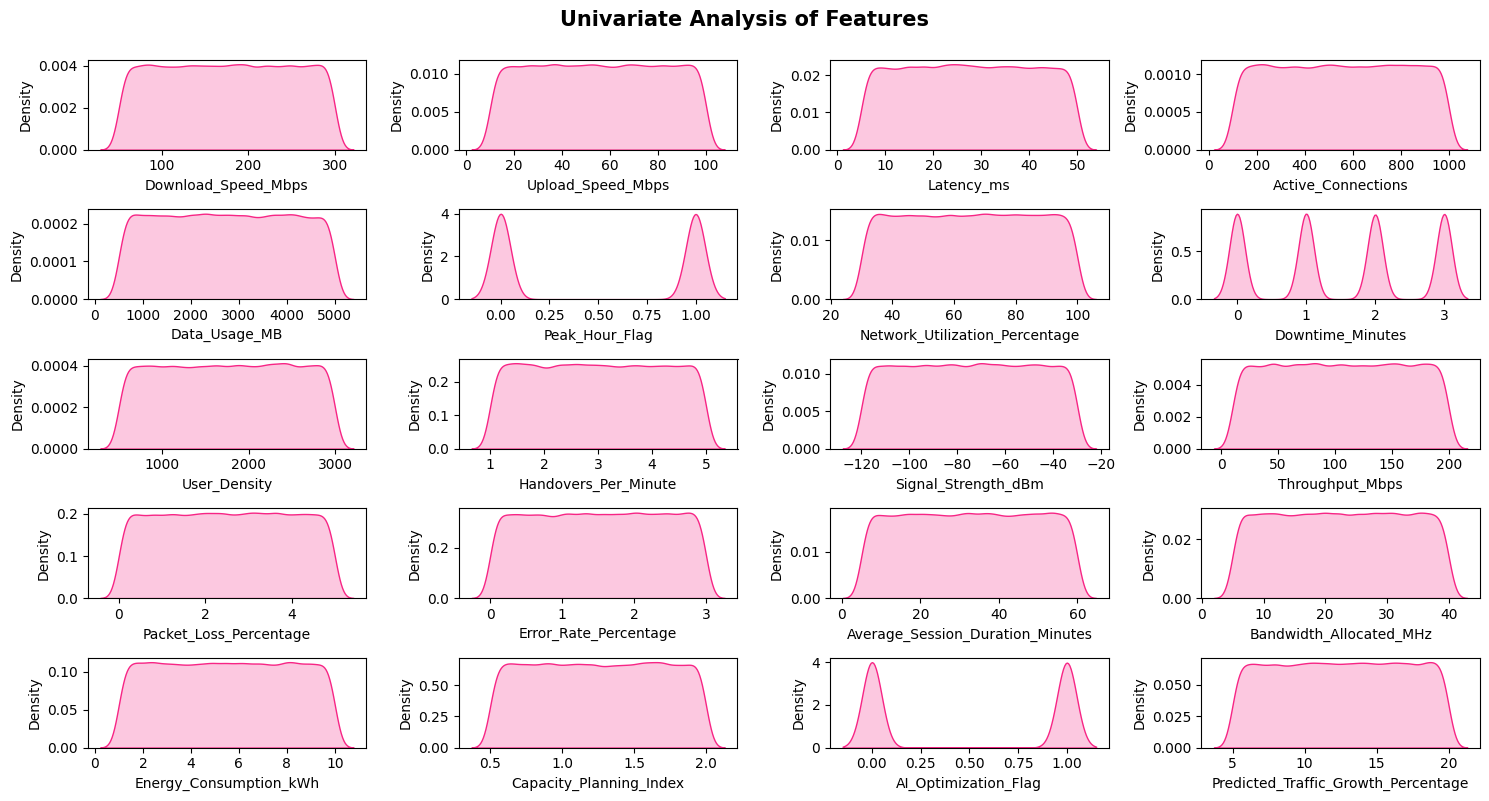

In [14]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Features',fontweight='bold',fontsize=15,y=1)

for i in range(0,len(num_features)):
    plt.subplot(10,4,i+1)
    sns.kdeplot(x=df[num_features[i]],shade=True,color='#F72585') #7209B7
    plt.tight_layout()

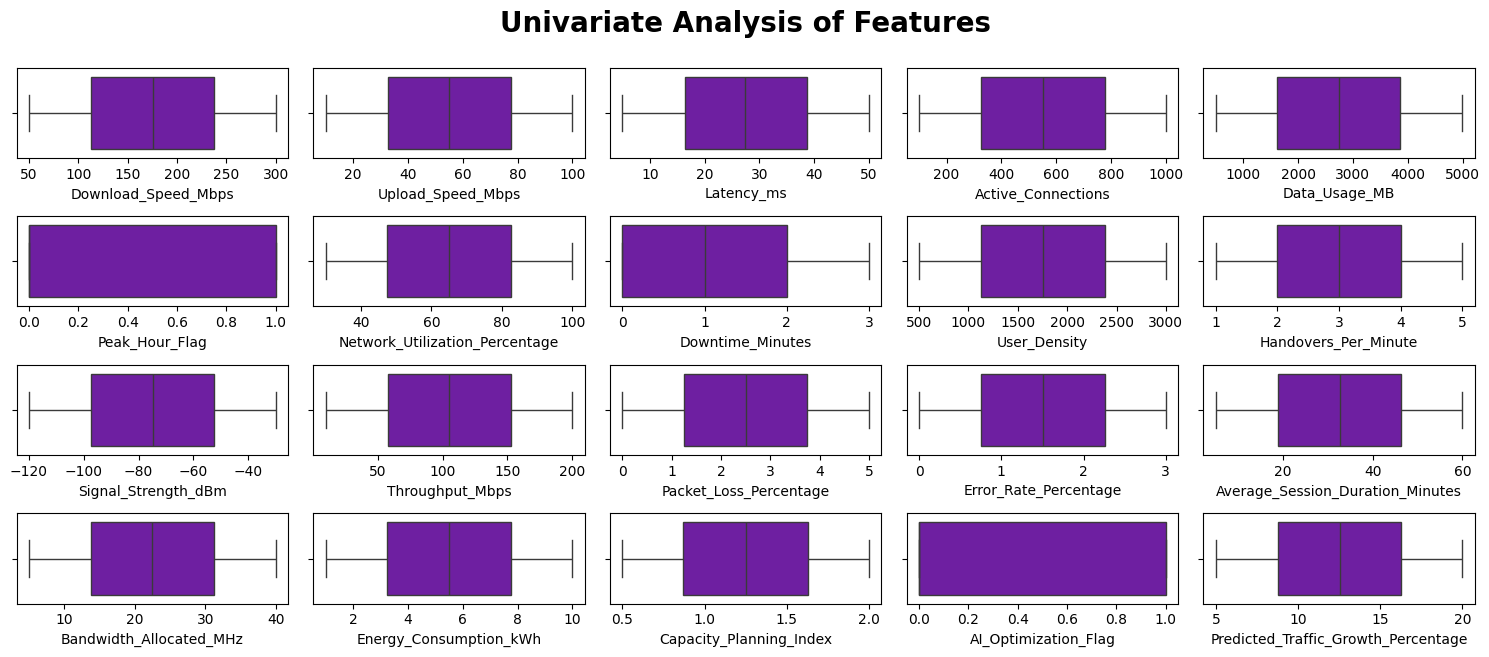

In [15]:
plt.figure(figsize = (15,15))
plt.suptitle('Univariate Analysis of Features',fontweight='bold',fontsize=20,y=1)

for i in range(0,len(num_features)):
    plt.subplot(10,5,i+1)
    sns.boxplot(data=df,x=num_features[i],color='#7209B7')
    plt.xlabel(num_features[i])
    plt.tight_layout()

In [ ]:
cat_features = df.select_dtypes(include='object').dtypes.index

In [ ]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Features',fontweight='bold',fontsize=15,y=1)

for i in range(0,len(cat_features)):
    plt.subplot(10,4,i+1)
    sns.countplot(x=df[cat_features[i]],color='#F72585')
    plt.tight_layout()

In [16]:
# Step 1: Pull Network Usage Data with SQL
# Use SQL to query data from the network usage database. Below is an example query:

In [ ]:
'''
SELECT 
    Timestamp,
    Region,
    Cell_Tower_ID,
    Network_Type,
    Active_Connections,
    Data_Usage_MB,
    Peak_Hour_Flag,
    Network_Utilization_Percentage
FROM 
    Network_Usage
WHERE 
    Timestamp BETWEEN '2024-01-01' AND '2024-12-31'
ORDER BY 
    Timestamp;
'''

In [ ]:
# Goal: Extract relevant columns like Timestamp, Region, Network_Utilization_Percentage, etc.
# Output: Save the extracted data as a CSV or directly load it into Python for analysis.

In [17]:
# Step 2: Analyze the Data for Peak Usage Times Using Python

In [55]:
# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

In [23]:
# Peak Usage Analysis
# Aggregate Data by Hour/Day:

# Aggregate data hourly
# hourly_usage = df.resample('H').mean()

# Aggregate data daily
# daily_usage = df.resample('D').mean()

In [56]:
# Filter numeric columns for aggregation
numeric_cols = df.select_dtypes(include=['number'])

# Aggregate data hourly
hourly_usage = numeric_cols.resample('H').mean()

# Aggregate data daily
daily_usage = numeric_cols.resample('D').mean()

# Display results
print("Hourly Usage:")
print(hourly_usage.head())

print("\nDaily Usage:")
print(daily_usage.head())

Hourly Usage:
                     Download_Speed_Mbps  Upload_Speed_Mbps  Latency_ms  \
Timestamp                                                                 
2024-01-01 00:00:00           172.683833          61.205167   28.646167   
2024-01-01 01:00:00           176.569000          52.471167   28.684667   
2024-01-01 02:00:00           168.326500          58.303500   27.045500   
2024-01-01 03:00:00           164.552500          53.050500   23.547000   
2024-01-01 04:00:00           157.567167          50.676500   27.945000   

                     Active_Connections  Data_Usage_MB  Peak_Hour_Flag  \
Timestamp                                                                
2024-01-01 00:00:00          523.916667    2930.535667        0.466667   
2024-01-01 01:00:00          606.333333    2532.657167        0.550000   
2024-01-01 02:00:00          599.016667    2540.426833        0.533333   
2024-01-01 03:00:00          547.233333    2670.488833        0.583333   
2024-01-01 04:00

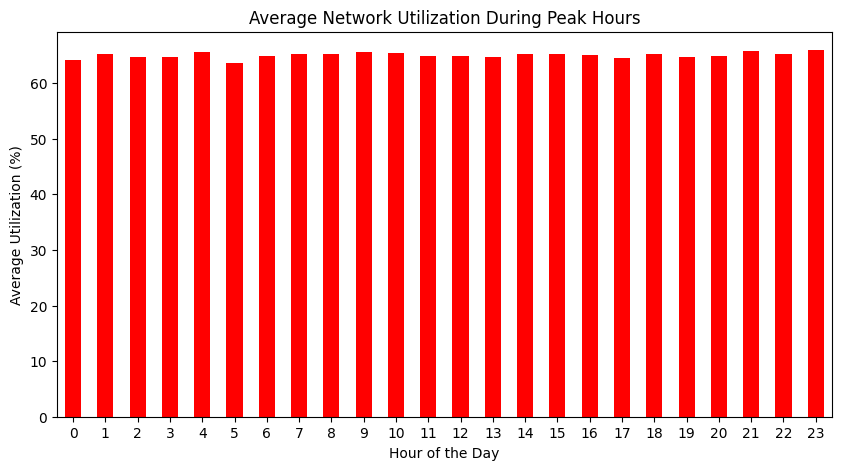

In [32]:
# Identify Peak Hours:

# Filter rows where Peak_Hour_Flag == 1
peak_df = df[df['Peak_Hour_Flag'] == 1]

# Group by hour of the day
peak_hours = peak_df.groupby(peak_df.index.hour)['Network_Utilization_Percentage'].mean()

# Plot peak usage
plt.figure(figsize=(10, 5))
peak_hours.plot(kind='bar', color='red')
plt.title('Average Network Utilization During Peak Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Utilization (%)')
plt.xticks(rotation=0)
plt.show()

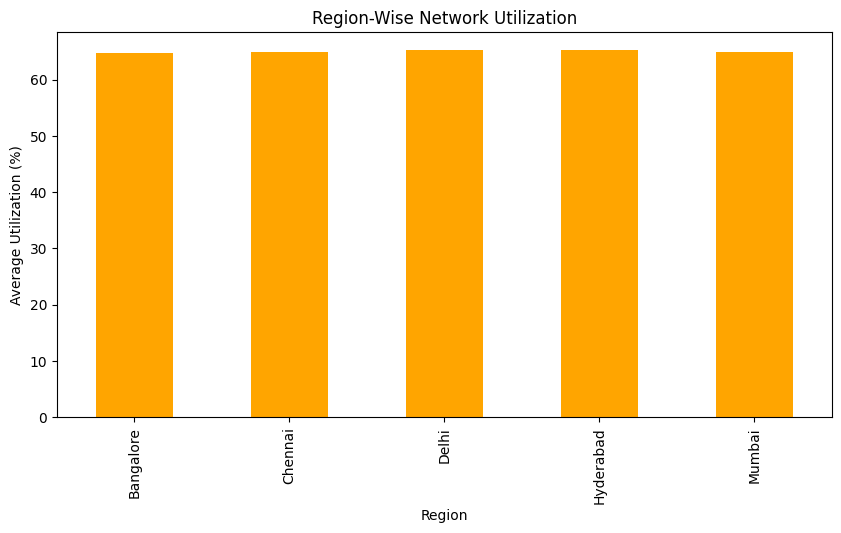

In [33]:
# Region-Wise Utilization:

region_usage = df.groupby('Region')['Network_Utilization_Percentage'].mean()

# Plot region-wise utilization
plt.figure(figsize=(10, 5))
region_usage.plot(kind='bar', color='orange')
plt.title('Region-Wise Network Utilization')
plt.xlabel('Region')
plt.ylabel('Average Utilization (%)')
plt.xticks(rotation=90)
plt.show()

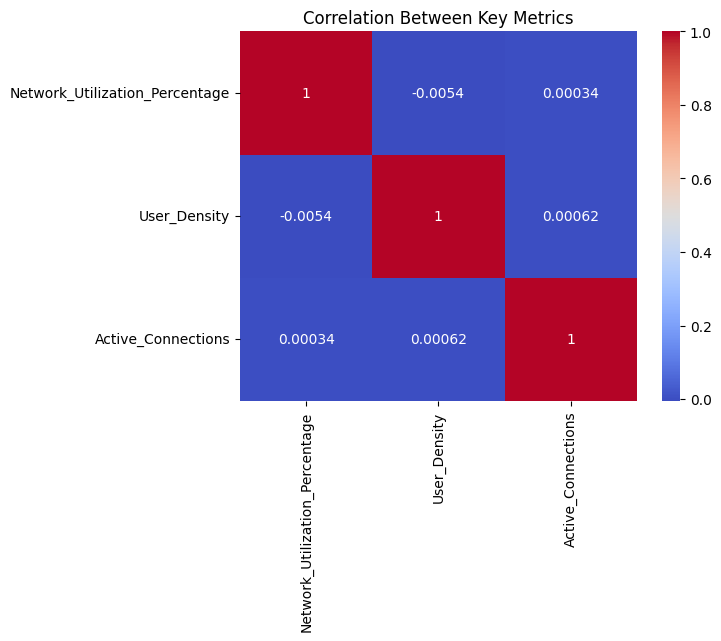

In [30]:
# Correlations (e.g., User Density vs. Utilization):

# Correlation heatmap
sns.heatmap(df[['Network_Utilization_Percentage', 'User_Density', 'Active_Connections']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Key Metrics')
plt.show()

In [ ]:
'''
# Use DAX formulas for custom metrics like peak-hour trends or predictive growth:

AvgPeakUsage = AVERAGEX(FILTER(Network_Usage, Network_Usage[Peak_Hour_Flag] = 1), Network_Usage[Network_Utilization_Percentage])
'''

In [34]:
# Predictive Modeling
# Problem: Predict future network utilization to plan infrastructure upgrades.

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [57]:
# Feature engineering
df['Hour'] = df.index.hour
df['DayOfWeek'] = df.index.dayofweek

In [36]:
# Define features and target
features = ['Hour', 'DayOfWeek', 'User_Density', 'Active_Connections', 'Weather_Condition']
X = pd.get_dummies(df[features], drop_first=True)
y = df['Network_Utilization_Percentage']

In [37]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Evaluate
predictions = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, predictions))

MSE: 441.89439316103494


In [38]:
# Anomaly Detection
# Problem: Detect unusual network utilization or downtimes.

from sklearn.ensemble import IsolationForest

# Select features for anomaly detection
anomaly_features = ['Latency_ms', 'Throughput_Mbps', 'Downtime_Minutes', 'Network_Utilization_Percentage']
X = df[anomaly_features]

# Fit Isolation Forest
model = IsolationForest(contamination=0.01, random_state=42)
df['Anomaly'] = model.fit_predict(X)

# Visualize anomalies
anomalies = df[df['Anomaly'] == -1]
print(anomalies)

                        Region Cell_Tower_ID Network_Type  \
Timestamp                                                   
2024-01-01 00:54:00     Mumbai       CT87395           5G   
2024-01-01 02:26:00    Chennai       CT31424           4G   
2024-01-01 03:55:00     Mumbai       CT68873           4G   
2024-01-01 05:57:00    Chennai       CT99583           4G   
2024-01-01 07:58:00  Hyderabad       CT99818           5G   
...                        ...           ...          ...   
2024-03-10 02:55:00     Mumbai       CT48558           4G   
2024-03-10 07:44:00     Mumbai       CT17379           5G   
2024-03-10 07:57:00    Chennai       CT15099           5G   
2024-03-10 08:01:00  Hyderabad       CT87595           4G   
2024-03-10 10:09:00     Mumbai       CT66495           5G   

                     Download_Speed_Mbps  Upload_Speed_Mbps  Latency_ms  \
Timestamp                                                                 
2024-01-01 00:54:00               193.28              90

In [42]:
# Clustering
# Problem: Group cell towers with similar utilization patterns for targeted upgrades.

from sklearn.cluster import KMeans

# Prepare data
cluster_features = ['Active_Connections', 'Data_Usage_MB', 'Network_Utilization_Percentage']

# Group data by Cell_Tower_ID to calculate mean utilization patterns
X = df.groupby('Cell_Tower_ID')[cluster_features].mean()

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
X['Cluster'] = kmeans.fit_predict(X)

# Map clusters back to the original DataFrame
df = df.merge(X['Cluster'], on='Cell_Tower_ID', how='left')

# Analyze clusters
cluster_analysis = df.groupby('Cluster')[cluster_features].mean()
print(cluster_analysis)

         Active_Connections  Data_Usage_MB  Network_Utilization_Percentage
Cluster                                                                   
0                548.902385    4025.227410                       64.949962
1                552.474550    1452.856596                       64.998466
2                550.637637    2742.682723                       65.056554


In [47]:
# Classification
# Problem: Classify network conditions as low, medium, or high utilization.

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

In [48]:
# Prepare data
X = df[['Latency_ms', 'Throughput_Mbps', 'Active_Connections', 'Signal_Strength_dBm']]
y = df['Congestion_Level']

In [49]:
# One-hot encode target
# y = pd.get_dummies(y, drop_first=True)

In [50]:
# Encode categorical target
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Congestion_Level'])

In [51]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train classifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.35      0.23      0.28     10032
           1       0.34      0.36      0.35      9984
           2       0.34      0.42      0.38      9984

    accuracy                           0.34     30000
   macro avg       0.34      0.34      0.33     30000
weighted avg       0.34      0.34      0.33     30000



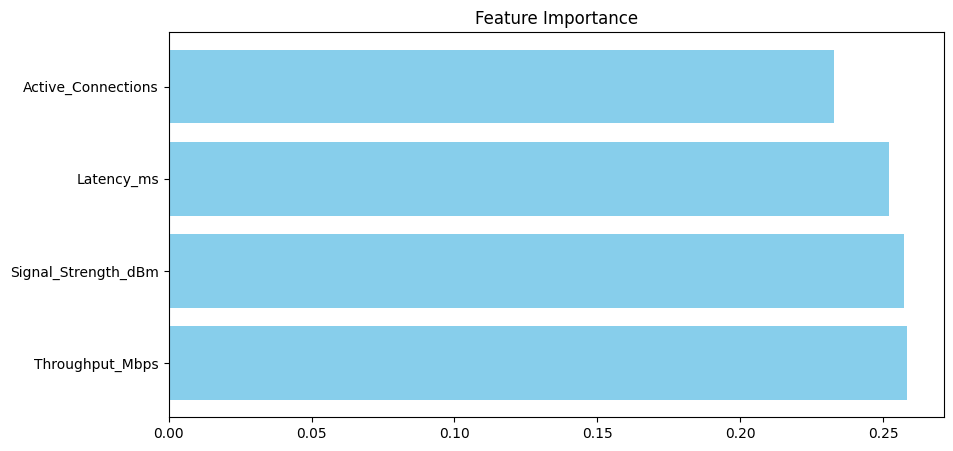

In [53]:
# Feature Importance Analysis
# Problem: Identify key factors driving network utilization.

# Train Random Forest
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Feature importance
feature_importance = model.feature_importances_
indices = np.argsort(feature_importance)[::-1]
features = X.columns

# Plot feature importance
plt.figure(figsize=(10, 5))
plt.barh(features[indices], feature_importance[indices], color='skyblue')
plt.title('Feature Importance')
plt.show()

In [ ]:
# Time-Series Forecasting
# Problem: Predict future traffic growth and bandwidth needs.

from statsmodels.tsa.arima_model import ARIMA

# Aggregate data daily
daily_usage = df['Network_Utilization_Percentage'].resample('D').mean()

# Fit ARIMA model
model = ARIMA(daily_usage, order=(5, 1, 0))
model_fit = model.fit(disp=0)

# Forecast
forecast = model_fit.forecast(steps=30)[0]
print(forecast)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.50 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=449.517, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=90.989, Time=0.19 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=87.897, Time=0.19 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=104.769, Time=0.30 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=87.177, Time=0.22 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=90.333, Time=0.27 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=0.22 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.29 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=73.639, Time=0.11 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=71.722, Time=0.08 sec
 ARIMA(0,0,1)(0,

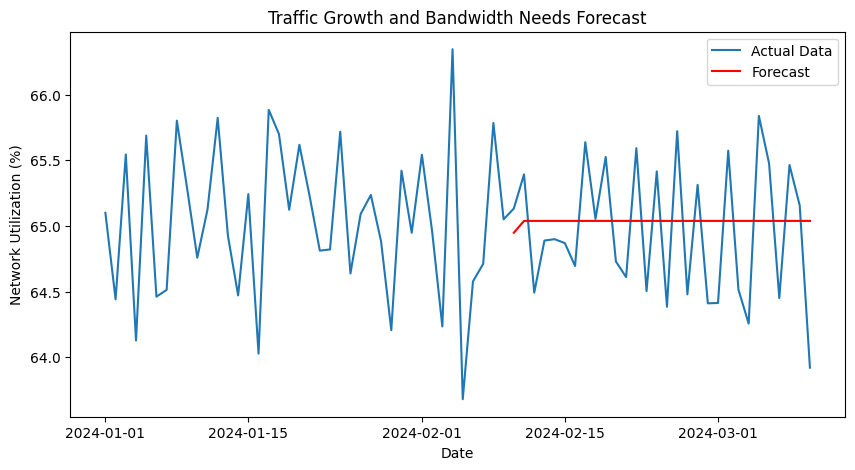

Forecast for the next 30 days:
2024-02-10    64.948512
2024-02-11    65.038721
2024-02-12    65.038721
2024-02-13    65.038721
2024-02-14    65.038721
2024-02-15    65.038721
2024-02-16    65.038721
2024-02-17    65.038721
2024-02-18    65.038721
2024-02-19    65.038721
2024-02-20    65.038721
2024-02-21    65.038721
2024-02-22    65.038721
2024-02-23    65.038721
2024-02-24    65.038721
2024-02-25    65.038721
2024-02-26    65.038721
2024-02-27    65.038721
2024-02-28    65.038721
2024-02-29    65.038721
2024-03-01    65.038721
2024-03-02    65.038721
2024-03-03    65.038721
2024-03-04    65.038721
2024-03-05    65.038721
2024-03-06    65.038721
2024-03-07    65.038721
2024-03-08    65.038721
2024-03-09    65.038721
2024-03-10    65.038721
Freq: D, dtype: float64


In [62]:
from pmdarima import auto_arima

# Aggregate data daily
# df['datetime'] = pd.to_datetime(df['datetime'])  # Ensure datetime column is in correct format
# df.set_index('datetime', inplace=True)
daily_usage = df['Network_Utilization_Percentage'].resample('D').mean()

# Split data into training and test sets
train = daily_usage[:-30]  # Use all but the last 30 days for training
test = daily_usage[-30:]   # Last 30 days for testing

# Fit ARIMA model using auto_arima
model = auto_arima(train, seasonal=False, stepwise=True, suppress_warnings=True, trace=True)

# Forecast
forecast = model.predict(n_periods=30)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(daily_usage, label='Actual Data')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.legend()
plt.title('Traffic Growth and Bandwidth Needs Forecast')
plt.xlabel('Date')
plt.ylabel('Network Utilization (%)')
plt.show()

# Print forecast
print(f"Forecast for the next 30 days:\n{forecast}")

In [ ]:
# Bandwidth Optimization (Reinforcement Learning)
# Problem: Dynamically optimize bandwidth allocation based on real-time network conditions.

import numpy as np
from stable_baselines3 import DQN
from stable_baselines3.common.envs import DummyVecEnv

# Simulate the environment
class NetworkEnv:
    def __init__(self):
        self.state = [50, 10, 20]  # [Bandwidth, User Density, Latency]
        self.done = False

    def reset(self):
        self.state = [50, 10, 20]
        self.done = False
        return np.array(self.state)

    def step(self, action):
        # Simulate the action's effect
        if action == 0:  # Decrease bandwidth
            self.state[0] -= 5
        elif action == 1:  # Increase bandwidth
            self.state[0] += 5
        
        reward = -self.state[2]  # Minimize latency
        self.done = self.state[0] > 100 or self.state[0] < 0
        return np.array(self.state), reward, self.done, {}

env = DummyVecEnv([lambda: NetworkEnv()])
model = DQN("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=10000)

In [154]:
df_2 = pd.read_csv('network_utilization_dataset_v3.csv')
pd.set_option('display.max_columns',55)
print(df_2.shape)

(100000, 52)


#### Columns and Descriptions

- Utilization_Percent	Percentage of network capacity utilized.
- Data_Rate	Data transmission rate (Mbps).
- Packet_Size	Average packet size (bytes).
- Protocol	Communication protocol (e.g., TCP, UDP).
- Traffic_Type	Type of network traffic (e.g., HTTP, FTP).
- Traffic_Growth_Rate	Percentage increase in network traffic over a period.
- Historical_Demand	Historical average demand for network resources.
- Avg_Data_Usage	Average data usage per session (MB).
- Session_Duration	Average session duration (minutes).
- Active_Hours	Time range of peak usage (e.g., 9 AM - 9 PM).
- User_Satisfaction_Score	Satisfaction score based on network quality (scale of 0 to 100).
- Signal_Strength	Signal strength in dBm (negative values).
- Latency	Network latency in milliseconds.
- Throughput	Amount of data successfully transferred (Mbps).
- Fault_Flag	Binary flag indicating the occurrence of a fault.
- Time_of_Day	Time of day for network usage (e.g., morning, afternoon, evening).
- Downtime	Binary flag indicating downtime.
- Network_Traffic	Volume of network traffic (GB).
- Maintenance_Needed	Binary flag indicating need for maintenance.
- Traffic_Load	Volume of network traffic as a percentage of capacity.
- Distance	Distance from network source to end-user (km).
- Demand	Current network demand in GB.

In [110]:
# Concatenate the DataFrames along the rows (axis=0)
# df_v2 = pd.concat([df, df_2])

In [112]:
# df_v2 = df.append(df_2, ignore_index=True)

In [117]:
# df_2.isnull().sum()

In [119]:
# df.duplicated().sum()

In [120]:
# Downtime Prediction
# Problem: Predict downtime based on network conditions to prevent outages.

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [121]:
# Create the Downtime_Flag column based on defined conditions
df_2['Downtime_Flag'] = np.where(
    (df_2['Latency'] > 200) |
    (df_2['Signal_Strength'] < -85) |
    (df_2['Utilization_Percent'] > 90) |
    (df_2['Fault_Flag'] == 1), 
    1, 0
)

In [127]:
# Example DataFrame (replace with your dataset)
X = df_2[['Signal_Strength_dBm', 'User_Density', 'Latency_ms', 'Weather_Condition']]
y = df_2['Downtime_Flag']

In [128]:
X = pd.get_dummies(X, columns=['Weather_Condition'], drop_first=True)

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00      6454
           1       0.68      1.00      0.81     13546

    accuracy                           0.68     20000
   macro avg       0.84      0.50      0.40     20000
weighted avg       0.78      0.68      0.55     20000



In [130]:
# Network Traffic Classification
# Problem: Classify the type of network traffic (e.g., streaming, browsing, gaming).

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [144]:
X = df_2[['Data_Rate', 'Packet_Size', 'Latency_ms', 'Protocol']]
y = df_2['Traffic_Type']

In [134]:
X = pd.get_dummies(X, columns=['Protocol'], drop_first=True)

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.24815


In [136]:
# Peak Load Prediction
# Problem: Predict peak usage times for network resource planning.

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [158]:
# Assuming df_2 is already created and has 'Traffic_Load' and 'Active_Hours' columns

# 1. Create Peak_Load_Probability based on Traffic_Load and Active_Hours
def calculate_peak_load_probability(row):
    if row['Traffic_Load'] > 80:
        if row['Active_Hours'] in ['Afternoon', 'Evening']:
            return np.random.uniform(0.7, 1)  # Higher probability during peak times
        else:
            return np.random.uniform(0.3, 0.7)  # Moderate probability during low traffic times
    return np.random.uniform(0, 0.3)  # Low probability during off-peak times

df_2['Peak_Load_Probability'] = df_2.apply(calculate_peak_load_probability, axis=1)

# 2. Create Hour based on Time_of_Day (mapping Time_of_Day to a specific hour range)
# Modify time_to_hour_map to return a single hour (one random hour) for each Active_Hours
time_to_hour_map = {
    'Morning': lambda: np.random.randint(6, 12),  # Morning: 6 AM - 11 AM
    'Afternoon': lambda: np.random.randint(12, 18),  # Afternoon: 12 PM - 5 PM
    'Evening': lambda: np.random.randint(18, 22),  # Evening: 6 PM - 9 PM
    'Night': lambda: np.random.randint(22, 24)  # Night: 10 PM - 11 PM
}

# Apply the mapping for 'Active_Hours' to 'Hour' correctly
df_2['Hour'] = df_2['Active_Hours'].map(lambda x: time_to_hour_map.get(x, lambda: np.random.randint(0, 6))())

# 3. Create Day_of_Week as a random assignment to simulate a typical weekly pattern
df_2['Day_of_Week'] = np.random.choice(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], size=len(df_2))

In [160]:
X = df_2[['Hour', 'Day_of_Week', 'Weather_Condition', 'Active_Connections', 'Data_Usage_MB']]
y = df_2['Peak_Load_Probability']

In [163]:
X = pd.get_dummies(X, columns=['Day_of_Week', 'Weather_Condition'], drop_first=True)

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'MSE: {mean_squared_error(y_test, y_pred)}')

MSE: 0.08751662604505957


In [166]:
# Capacity Planning
# Problem: Recommend required capacity for future network needs.

from sklearn.cluster import KMeans

X = df_2[['Region', 'Traffic_Growth_Rate', 'Historical_Demand']]
X = pd.get_dummies(X, columns=['Region'], drop_first=True)

kmeans = KMeans(n_clusters=5)
df_2['Cluster'] = kmeans.fit_predict(X)
print(df_2['Cluster'].value_counts())

Cluster
0    20224
2    20117
3    20074
1    19842
4    19743
Name: count, dtype: int64


In [169]:
# User Behavior Analysis
# Problem: Identify patterns in user behavior that impact network utilization.

from sklearn.cluster import DBSCAN

X = df_2[['Avg_Data_Usage', 'Session_Duration', 'Active_Hours']]
X = pd.get_dummies(X, columns=['Active_Hours'], drop_first=True)
dbscan = DBSCAN(eps=0.5, min_samples=5).fit(X)
df_2['User_Cluster'] = dbscan.labels_

print(df_2['User_Cluster'].value_counts())

User_Cluster
-1       17302
 627        48
 46         48
 4318       48
 2445       47
         ...  
 7484        2
 7658        2
 7416        2
 6364        1
 7871        1
Name: count, Length: 7915, dtype: int64


In [170]:
# Service Quality Prediction
# Problem: Predict service quality for users based on network conditions.

from sklearn.ensemble import GradientBoostingRegressor

In [171]:
X = df_2[['Signal_Strength', 'Latency', 'Data_Rate']]
y = df_2['User_Satisfaction_Score']

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'MSE: {mean_squared_error(y_test, y_pred)}')

MSE: 209.8244882925984


In [173]:
# Fault Detection
# Problem: Detect network faults to trigger proactive maintenance.

from sklearn.tree import DecisionTreeClassifier

In [174]:
X = df_2[['Signal_Strength', 'Throughput', 'Latency']]
y = df_2['Fault_Flag']

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89     18015
           1       0.10      0.11      0.10      1985

    accuracy                           0.81     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.82      0.81      0.82     20000



In [180]:
# Load Balancing
# Problem: Distribute network load efficiently to minimize congestion.

from sklearn.cluster import KMeans

X = df_2[['Region', 'Time_of_Day', 'Active_Connections', 'Utilization_Percent']]
X = pd.get_dummies(X, columns=['Region', 'Time_of_Day'], drop_first=True)
kmeans = KMeans(n_clusters=4)
df_2['Load_Balance_Group'] = kmeans.fit_predict(X)

print(df_2['Load_Balance_Group'].value_counts())

Load_Balance_Group
0    25206
3    24976
2    24936
1    24882
Name: count, dtype: int64


In [181]:
# Predictive Maintenance
# Problem: Predict equipment failures for proactive repairs.

from sklearn.ensemble import RandomForestClassifier

In [182]:
X = df_2[['Downtime', 'Signal_Strength', 'Network_Traffic']]
y = df_2['Maintenance_Needed']

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91     17016
           1       0.16      0.02      0.04      2984

    accuracy                           0.84     20000
   macro avg       0.51      0.50      0.48     20000
weighted avg       0.75      0.84      0.78     20000



In [184]:
# Latency Reduction
# Problem: Minimize latency for critical services.

from sklearn.ensemble import RandomForestRegressor

In [185]:
X = df_2[['Traffic_Load', 'Distance', 'Signal_Strength']]
y = df_2['Latency']

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'MSE: {mean_squared_error(y_test, y_pred)}')

MSE: 7004.05662972083


In [189]:
# Network Topology Optimization
# Problem: Design optimal network topology for resource efficiency.

from sklearn.cluster import KMeans

# 1. Create Traffic based on Utilization_Percent, Data_Rate, and Packet_Size
# Formula: Traffic = Utilization_Percent * Data_Rate * Packet_Size

df_2['Traffic'] = df_2['Utilization_Percent'] * df_2['Data_Rate'] * df_2['Packet_Size'] / 1000000  # Normalize by a factor to scale

X = df_2[['Distance', 'Traffic', 'Region']]
X = pd.get_dummies(X, columns=['Region'], drop_first=True)
kmeans = KMeans(n_clusters=3)
df_2['Topology_Group'] = kmeans.fit_predict(X)

print(df_2['Topology_Group'].value_counts())

Topology_Group
2    33479
0    33271
1    33250
Name: count, dtype: int64


In [190]:
# Demand Prediction for New Infrastructure
# Problem: Predict demand in underutilized regions.

from statsmodels.tsa.arima.model import ARIMA

# Time-series data
ts_data = df_2['Demand'].values
model = ARIMA(ts_data, order=(5, 1, 0))
model_fit = model.fit()

forecast = model_fit.forecast(steps=12)
print(f'12-month forecast: {forecast}')

12-month forecast: [337.43233305 318.41278234 319.76008376 292.96238957 305.19474496
 297.88311173 311.89353456 307.68366555 305.86929239 303.62523528
 305.32278721 305.40141829]


In [ ]:
# More Experiment Machine Learning Problems

# Time Series Forecasting for Network Traffic Prediction
# Problem: Predict future network traffic based on historical data, including factors such as day of the week, traffic patterns, and network usage.
# Approach: Use ARIMA, Prophet, or LSTM (Long Short-Term Memory) models for sequence prediction. Time-series data can be pre-processed using techniques like smoothing, differencing, and seasonal decomposition.

# Anomaly Detection in Network Traffic
# Problem: Detect unusual patterns or outliers in network traffic data that may indicate a potential security breach or fault in the system.
# Approach: Implement Autoencoders, Isolation Forest, or One-Class SVM for unsupervised anomaly detection. The model learns the normal pattern of network traffic and flags anything deviating from it as an anomaly.

# Traffic Classification with Deep Learning
# Problem: Classify network traffic into categories such as video streaming, file transfer, gaming, etc., based on packet-level data (e.g., size, protocol, flow).
# Approach: Use Convolutional Neural Networks (CNN) or Recurrent Neural Networks (RNN) to capture spatial and temporal features from the raw data. Feature engineering is critical to extract meaningful inputs for the model.

# Predictive Maintenance for Network Devices
# Problem: Predict when a network device (router, switch, etc.) will likely fail based on sensor data, historical logs, and other metrics.
# Approach: Use Random Forest, XGBoost, or Deep Learning models to classify devices as likely to fail or function normally. Time-series features like device age, maintenance history, and utilization could be relevant here.

# User Behavior Prediction in a Network Environment
# Problem: Predict user behavior such as login times, application usage, or resource consumption based on historical usage data.
# Approach: Use Clustering (e.g., K-Means, DBSCAN) for grouping users with similar behavior and Supervised Learning (e.g., Logistic Regression, SVM) to predict future behavior. Feature engineering plays a key role in identifying significant user traits.

# Network Traffic Forecasting with Seasonal Variations
# Problem: Forecast network traffic during different seasons (e.g., holidays, events, etc.), adjusting for seasonality and other temporal factors.
# Approach: Use SARIMA (Seasonal ARIMA) or LSTM with attention mechanisms to account for both short-term fluctuations and long-term seasonal patterns in the data.

# Network Load Balancing Optimization
# Problem: Predict and optimize load balancing among multiple servers or network components to prevent bottlenecks and improve performance.
# Approach: Implement Reinforcement Learning (RL) algorithms like Q-learning or Deep Q Networks (DQN) to dynamically adjust load distribution based on traffic data and real-time feedback.

# Network Security Threat Detection
# Problem: Detect security threats like Distributed Denial of Service (DDoS) attacks, malware propagation, or unauthorized access attempts from network traffic data.
# Approach: Use Supervised Learning (e.g., Random Forest, SVM) for classification, or Deep Learning models like CNN to analyze packet data. Techniques like Natural Language Processing (NLP) can be useful for analyzing logs or packets that have textual data.

# Predicting Customer Churn in Network Service Providers
# Problem: Predict whether a customer will leave the network service provider based on historical usage patterns, payment history, and customer interactions.
# Approach: Use Survival Analysis, Random Forest, or XGBoost to classify customers as likely to churn or stay. Include features like usage frequency, customer complaints, and loyalty program participation.

# Multi-Label Classification for Network Data
# Problem: Classify network data into multiple categories simultaneously. For example, classify a packet that could belong to both "video" and "gaming" traffic.
# Approach: Use Multi-Label Classification techniques with Logistic Regression, Random Forest, or Neural Networks. Techniques like Binary Relevance or Classifier Chains can be used to handle multi-label tasks.

# Network Routing Optimization Using Reinforcement Learning
# Problem: Optimize the routing of network traffic in real-time to minimize latency and maximize throughput across a network with multiple routers and switches.
# Approach: Use Reinforcement Learning (RL) and techniques like Deep Q-Learning (DQN) or Policy Gradient Methods for dynamic route selection based on network state and performance metrics.

# Demand Forecasting for Network Resources
# Problem: Predict future demand for network resources (bandwidth, storage, etc.) based on historical data and usage trends.
# Approach: Use Time Series Forecasting models like LSTM, Prophet, or ARIMA to predict future demand based on historical usage data.

# Network Traffic Prioritization Using Clustering
# Problem: Classify and prioritize network traffic to ensure critical applications (e.g., voice, video) have higher priority over less time-sensitive data.
# Approach: Use Clustering Algorithms like K-Means or Gaussian Mixture Models (GMM) to group traffic into different priority classes. Then use Reinforcement Learning to adapt and optimize traffic prioritization dynamically.

# Load Prediction for Cloud-Based Networking Services
# Problem: Predict the load on cloud-based networking services based on real-time data to optimize resource allocation.
# Approach: Use Gradient Boosting techniques like XGBoost or LightGBM to predict load levels, and then apply Optimization Algorithms to adjust resource allocation.

# Predicting Network Congestion with Traffic Patterns
# Problem: Predict network congestion events based on current traffic patterns and historical congestion data.
# Approach: Use Regression Models like SVR (Support Vector Regression) or Neural Networks to predict congestion points. Feature engineering is critical to include time-of-day, traffic type, and historical congestion data.

# Real-Time Fault Detection and Recovery in Network Infrastructure
# Problem: Automatically detect faults in real-time and predict when and where the next failure may occur in the network infrastructure.
# Approach: Use Real-Time Machine Learning models, such as Random Forest or Deep Learning (CNN, LSTM), for fault detection. Incorporate real-time monitoring data and failure prediction based on past data.

# Customer Satisfaction Prediction in a Network Service
# Problem: Predict customer satisfaction based on network performance metrics (e.g., latency, uptime) and customer usage patterns.
# Approach: Use Classification Models (e.g., Logistic Regression, XGBoost) to predict satisfaction levels based on a variety of features. Multi-class classification could be used to categorize satisfaction into different levels (e.g., low, medium, high).

# Predicting Wireless Network Coverage and Signal Strength
# Problem: Predict the signal strength and coverage area for a given wireless network based on environmental features (location, weather, obstacles).
# Approach: Use Geospatial Analysis with Machine Learning, combining Random Forests and KNN (K-Nearest Neighbors) to predict coverage strength based on location data, obstacles, and weather conditions.

# Network Capacity Planning Using Machine Learning
# Problem: Predict the future capacity needs for a network based on current traffic trends and historical growth.
# Approach: Use Time Series Forecasting (e.g., LSTM, ARIMA) to predict future traffic volumes and use that data for capacity planning and scaling decisions.

# Automated Network Configuration Using Machine Learning
# Problem: Automatically configure network devices (e.g., routers, switches) based on usage patterns, traffic demands, and performance data.
# Approach: Use Reinforcement Learning (RL) or Deep Reinforcement Learning (DRL) for configuring network parameters automatically. The model can learn optimal configurations based on network performance and traffic demands.

In [ ]:
# Thank You!
# More Advance Working Sonn..!
# Notebook Project By : PRASAD JADHAV (ML-ENG)
# LinkedIn: linkedin.com/in/prasadmjadhav2 | Github: github.com/prasadmjadhav2 | Mail: prasadmjadhav6161@gmail.com